In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# 1. Download the data. Implement a data loader class to load the dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(lambda x:x.repeat(3,1,1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#When the dataset is loaded, the default image format is Numpy, so transforms it into a Tensor via transforms.
# Then, the input image is normalized.
# After Normalize, perform the following operations on each channel: image = (image - average) /std

batch_size = 4


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img*0.5 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    #The tensor tensor in PyTorch stores the image as (b, C,w,h) (number of images, number of channels, height, width).

                                                    #In tensor, the number of pipes, width, height.And the standard RBG image is (width, height, number of pipes).
    plt.show()

2


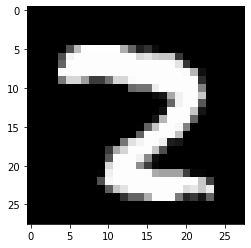

2
tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])


In [4]:
(data,label)=trainset[28]
print(classes[label])
imshow(data)
print(label)
print(data)

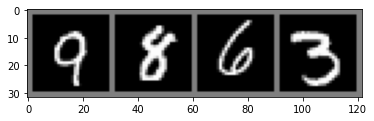

In [5]:
dataiter = iter(trainloader)   
images, labels = dataiter.next()  
# show images
imshow(torchvision.utils.make_grid(images))

# 2.Define the model

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)             #define convolutional layers and pooling layers
        self.conv2 = nn.Conv2d(24, 48, 5)
        self.conv3 = nn.Conv2d(48, 64, 3)
        self.fc1 = nn.Linear(64, 120)       #define fully-connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()

# 3. Utilize a gradient-based optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()         #用交叉熵作loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  #随机梯度下降法

# 4. Train the model! 

In [34]:
from visdom import Visdom
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data          

        # zero the parameter gradients
        optimizer.zero_grad()       #gradient starts from 0

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.649
[1,  4000] loss: 0.241
[1,  6000] loss: 0.147
[1,  8000] loss: 0.116
[1, 10000] loss: 0.095
[1, 12000] loss: 0.079
[1, 14000] loss: 0.075
[2,  2000] loss: 0.061
[2,  4000] loss: 0.061
[2,  6000] loss: 0.058
[2,  8000] loss: 0.053
[2, 10000] loss: 0.051
[2, 12000] loss: 0.050
[2, 14000] loss: 0.043
[3,  2000] loss: 0.035
[3,  4000] loss: 0.032
[3,  6000] loss: 0.037
[3,  8000] loss: 0.036
[3, 10000] loss: 0.042
[3, 12000] loss: 0.034
[3, 14000] loss: 0.044
[4,  2000] loss: 0.024
[4,  4000] loss: 0.026
[4,  6000] loss: 0.024
[4,  8000] loss: 0.032
[4, 10000] loss: 0.032
[4, 12000] loss: 0.026
[4, 14000] loss: 0.029
Finished Training


# 5. Evaluate the trained model on an independent test set.

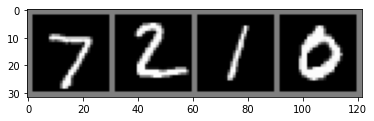

GroundTruth:      7     2     1     0


In [35]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
outputs = net(images)

In [37]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:      7     2     1     0


In [38]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)        #put it into model
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 99 %


In [39]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}  #define list
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class 0     is: 99.0 %
Accuracy for class 1     is: 99.9 %
Accuracy for class 2     is: 99.3 %
Accuracy for class 3     is: 99.6 %
Accuracy for class 4     is: 99.3 %
Accuracy for class 5     is: 98.7 %
Accuracy for class 6     is: 99.1 %
Accuracy for class 7     is: 98.7 %
Accuracy for class 8     is: 99.1 %
Accuracy for class 9     is: 99.0 %


In [6]:
from visdom import Visdom
visdom_show = Visdom(env="trainloss")
visdom_accu = Visdom(env="testaccu")
visdom_test = Visdom(env="testloss")
for epoch in range(10):  # loop over the dataset multiple times
        #visualization

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data          

        # zero the parameter gradients
        optimizer.zero_grad()       #start with zero

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
      

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if (i+1)==12000:
                visdom_show.line(
                    X=[epoch+1],
                    Y=[float(running_loss / 2000)],
                    win='accu and loss',
                    name='train_loss',
                    opts=dict(title='accu and loss',  legend=['train_loss']),
                    update='append')
            running_loss = 0.0
    correct = 0
    total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        running_loss2=0
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)        
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
            loss = criterion(outputs, labels)
            running_loss2 += loss.item()
        print('Accuracy of the network on the 2500 test images: %d %%' % (100 * correct / total))
        visdom_accu.line(
            X=[epoch+1],
            Y=[(correct / total)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_accu']),
            name='test_accu',
            update='append')
        print('[%d] loss: %.3f' %
                  (epoch + 1,running_loss2 / 2500))
        visdom_test.line(
            X=[epoch+1],
            Y=[float(running_loss2 / 2500)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_loss']),
            name='test_loss',
            update='append')
        print(i)
print('Finished Training')

Setting up a new session...
Setting up a new session...
Setting up a new session...
D:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 1.510
[1,  4000] loss: 0.232
[1,  6000] loss: 0.149
[1,  8000] loss: 0.104
[1, 10000] loss: 0.094
[1, 12000] loss: 0.084
[1, 14000] loss: 0.071
Accuracy of the network on the 2500 test images: 97 %
[1] loss: 0.063
14999
[2,  2000] loss: 0.058
[2,  4000] loss: 0.055
[2,  6000] loss: 0.062
[2,  8000] loss: 0.061
[2, 10000] loss: 0.051
[2, 12000] loss: 0.051
[2, 14000] loss: 0.048
Accuracy of the network on the 2500 test images: 98 %
[2] loss: 0.061
14999
[3,  2000] loss: 0.040
[3,  4000] loss: 0.041
[3,  6000] loss: 0.037
[3,  8000] loss: 0.041
[3, 10000] loss: 0.039
[3, 12000] loss: 0.033
[3, 14000] loss: 0.033
Accuracy of the network on the 2500 test images: 98 %
[3] loss: 0.037
14999
[4,  2000] loss: 0.029
[4,  4000] loss: 0.025
[4,  6000] loss: 0.026
[4,  8000] loss: 0.022
[4, 10000] loss: 0.034
[4, 12000] loss: 0.027
[4, 14000] loss: 0.034
Accuracy of the network on the 2500 test images: 98 %
[4] loss: 0.055
14999
[5,  2000] loss: 0.019
[5,  4000] loss: 0.021
[5,  6

# 6. Provide a summary of any architectural modifications made

Provide a summary of any architectural modifications made, plots of the loss evolution from (4), and plots of your results from (5). Please save your code and results for submission.

so I try to change the convlutional layers to 4, and the activation function to the variation of relu.

In [22]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 3)
        self.pool = nn.MaxPool2d(2, 2)             #define convolutional layers and pooling layers
        self.conv2 = nn.Conv2d(12, 24, 2)
        self.conv3 = nn.Conv2d(24, 48, 2)
        self.conv4 = nn.Conv2d(48, 64, 1)
        self.fc1 = nn.Linear(64, 120)       #define fully-connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.rrelu(self.conv1(x)))
        x = self.pool(F.rrelu(self.conv2(x)))
        x = self.pool(F.rrelu(self.conv3(x)))
        x = self.pool(F.rrelu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.rrelu(self.fc1(x))
        x = F.rrelu(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()         #用交叉熵作loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  #随机梯度下降法

In [24]:
from visdom import Visdom
visdom_show = Visdom(env="trainloss_new")
visdom_accu = Visdom(env="testaccu_new")
visdom_test = Visdom(env="testloss_new")
for epoch in range(10):  # loop over the dataset multiple times
        #可视化

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data          

        # zero the parameter gradients
        optimizer.zero_grad()       #梯度从零开始

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
      

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if (i+1)==12000:
                visdom_show.line(
                    X=[epoch+1],
                    Y=[float(running_loss / 2000)],
                    win='accu and loss',
                    name='train_loss_new',
                    opts=dict(title='accu and loss',  legend=['train_loss_new']),
                    update='append')
            running_loss = 0.0
    correct = 0
    total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        running_loss2=0
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)        
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
            loss = criterion(outputs, labels)
            running_loss2 += loss.item()
        print('Accuracy of the network on the 2500 test images: %d %%' % (100 * correct / total))
        visdom_accu.line(
            X=[epoch+1],
            Y=[(correct / total)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_accu_new']),
            name='test_accu_new',
            update='append')
        print('[%d] loss: %.3f' %
                  (epoch + 1,running_loss2 / 2500))
        visdom_test.line(
            X=[epoch+1],
            Y=[float(running_loss2 / 2500)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_loss_new']),
            name='test_loss_new',
            update='append')
        print(i)
print('Finished Training')

Setting up a new session...
Setting up a new session...
Setting up a new session...


[1,  2000] loss: 2.299
[1,  4000] loss: 2.044
[1,  6000] loss: 0.910
[1,  8000] loss: 0.344
[1, 10000] loss: 0.237
[1, 12000] loss: 0.159
[1, 14000] loss: 0.143
Accuracy of the network on the 2500 test images: 96 %
[1] loss: 0.117
14999
[2,  2000] loss: 0.124
[2,  4000] loss: 0.095
[2,  6000] loss: 0.096
[2,  8000] loss: 0.109
[2, 10000] loss: 0.081
[2, 12000] loss: 0.091
[2, 14000] loss: 0.080
Accuracy of the network on the 2500 test images: 97 %
[2] loss: 0.068
14999
[3,  2000] loss: 0.071
[3,  4000] loss: 0.069
[3,  6000] loss: 0.068
[3,  8000] loss: 0.068
[3, 10000] loss: 0.059
[3, 12000] loss: 0.063
[3, 14000] loss: 0.070
Accuracy of the network on the 2500 test images: 97 %
[3] loss: 0.068
14999
[4,  2000] loss: 0.057
[4,  4000] loss: 0.051
[4,  6000] loss: 0.050
[4,  8000] loss: 0.050
[4, 10000] loss: 0.054
[4, 12000] loss: 0.051
[4, 14000] loss: 0.050
Accuracy of the network on the 2500 test images: 98 %
[4] loss: 0.049
14999
[5,  2000] loss: 0.033
[5,  4000] loss: 0.039
[5,  6

Then I try to compare diffrent relu function as activation function

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(lambda x:x.repeat(3,1,1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#When the dataset is loaded, the default image format is Numpy, so transforms it into a Tensor via transforms.
# Then, the input image is normalized.
# After Normalize, perform the following operations on each channel: image = (image - average) /std

batch_size = 4


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)             #define convolutional layers and pooling layers
        self.conv2 = nn.Conv2d(24, 48, 5)
        self.conv3 = nn.Conv2d(48, 64, 3)
        self.fc1 = nn.Linear(64, 120)       #define fully-connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()         #用交叉熵作loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  #随机梯度下降法

In [3]:
from visdom import Visdom
visdom_show = Visdom(env="trainloss_relu")
visdom_accu = Visdom(env="testaccu_relu")
visdom_test = Visdom(env="testloss_relu")
for epoch in range(10):  # loop over the dataset multiple times
        #可视化

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data          

        # zero the parameter gradients
        optimizer.zero_grad()       #梯度从零开始

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
      

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if (i+1)==12000:
                visdom_show.line(
                    X=[epoch+1],
                    Y=[float(running_loss / 2000)],
                    win='accu and loss',
                    name='train_loss_relu',
                    opts=dict(title='accu and loss',  legend=['train_loss_relu']),
                    update='append')
            running_loss = 0.0
    correct = 0
    total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        running_loss2=0
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)        #放进模型里
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  #相同的累加
            loss = criterion(outputs, labels)
            running_loss2 += loss.item()
        print('Accuracy of the network on the 2500 test images: %d %%' % (100 * correct / total))
        visdom_accu.line(
            X=[epoch+1],
            Y=[(correct / total)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_accu_relu']),
            name='test_accu_relu',
            update='append')
        print('[%d] loss: %.3f' %
                  (epoch + 1,running_loss2 / 2500))
        visdom_test.line(
            X=[epoch+1],
            Y=[float(running_loss2 / 2500)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_loss_relu']),
            name='test_loss_relu',
            update='append')
        print(i)
print('Finished Training')

Setting up a new session...
Setting up a new session...
Setting up a new session...
D:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 1.746
[1,  4000] loss: 0.261
[1,  6000] loss: 0.141
[1,  8000] loss: 0.113
[1, 10000] loss: 0.102
[1, 12000] loss: 0.074
[1, 14000] loss: 0.086
Accuracy of the network on the 2500 test images: 97 %
[1] loss: 0.062
14999
[2,  2000] loss: 0.058
[2,  4000] loss: 0.053
[2,  6000] loss: 0.055
[2,  8000] loss: 0.058
[2, 10000] loss: 0.052
[2, 12000] loss: 0.050
[2, 14000] loss: 0.055
Accuracy of the network on the 2500 test images: 98 %
[2] loss: 0.039
14999
[3,  2000] loss: 0.032
[3,  4000] loss: 0.038
[3,  6000] loss: 0.039
[3,  8000] loss: 0.036
[3, 10000] loss: 0.041
[3, 12000] loss: 0.034
[3, 14000] loss: 0.041
Accuracy of the network on the 2500 test images: 98 %
[3] loss: 0.034
14999
[4,  2000] loss: 0.025
[4,  4000] loss: 0.034
[4,  6000] loss: 0.026
[4,  8000] loss: 0.033
[4, 10000] loss: 0.025
[4, 12000] loss: 0.026
[4, 14000] loss: 0.036
Accuracy of the network on the 2500 test images: 98 %
[4] loss: 0.034
14999
[5,  2000] loss: 0.021
[5,  4000] loss: 0.023
[5,  6

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(lambda x:x.repeat(3,1,1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#When the dataset is loaded, the default image format is Numpy, so transforms it into a Tensor via transforms.
# Then, the input image is normalized.
# After Normalize, perform the following operations on each channel: image = (image - average) /std

batch_size = 4


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)             #define convolutional layers and pooling layers
        self.conv2 = nn.Conv2d(24, 48, 5)
        self.conv3 = nn.Conv2d(48, 64, 3)
        self.fc1 = nn.Linear(64, 120)       #define fully-connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()         #用交叉熵作loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  #随机梯度下降法

In [5]:
from visdom import Visdom
visdom_show = Visdom(env="trainloss_leakyrelu")
visdom_accu = Visdom(env="testaccu_leakyrelu")
visdom_test = Visdom(env="testloss_leakyrelu")
for epoch in range(10):  # loop over the dataset multiple times
        #可视化

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data          

        # zero the parameter gradients
        optimizer.zero_grad()       #梯度从零开始

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
      

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if (i+1)==12000:
                visdom_show.line(
                    X=[epoch+1],
                    Y=[float(running_loss / 2000)],
                    win='accu and loss',
                    name='train_loss_leakyrelu',
                    opts=dict(title='accu and loss',  legend=['train_loss_leakyrelu']),
                    update='append')
            running_loss = 0.0
    correct = 0
    total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        running_loss2=0
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)        #放进模型里
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  #相同的累加
            loss = criterion(outputs, labels)
            running_loss2 += loss.item()
        print('Accuracy of the network on the 2500 test images: %d %%' % (100 * correct / total))
        visdom_accu.line(
            X=[epoch+1],
            Y=[(correct / total)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_accu_leakyrelu']),
            name='test_accu_leakyrelu',
            update='append')
        print('[%d] loss: %.3f' %
                  (epoch + 1,running_loss2 / 2500))
        visdom_test.line(
            X=[epoch+1],
            Y=[float(running_loss2 / 2500)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_loss_leakyrelu']),
            name='test_loss_leakyrelu',
            update='append')
        print(i)
print('Finished Training')

Setting up a new session...
Setting up a new session...
Setting up a new session...


[1,  2000] loss: 1.561
[1,  4000] loss: 0.235
[1,  6000] loss: 0.142
[1,  8000] loss: 0.116
[1, 10000] loss: 0.094
[1, 12000] loss: 0.090
[1, 14000] loss: 0.075
Accuracy of the network on the 2500 test images: 98 %
[1] loss: 0.053
14999
[2,  2000] loss: 0.062
[2,  4000] loss: 0.051
[2,  6000] loss: 0.058
[2,  8000] loss: 0.052
[2, 10000] loss: 0.055
[2, 12000] loss: 0.052
[2, 14000] loss: 0.056
Accuracy of the network on the 2500 test images: 98 %
[2] loss: 0.044
14999
[3,  2000] loss: 0.038
[3,  4000] loss: 0.038
[3,  6000] loss: 0.036
[3,  8000] loss: 0.044
[3, 10000] loss: 0.041
[3, 12000] loss: 0.037
[3, 14000] loss: 0.035
Accuracy of the network on the 2500 test images: 99 %
[3] loss: 0.034
14999
[4,  2000] loss: 0.031
[4,  4000] loss: 0.032
[4,  6000] loss: 0.028
[4,  8000] loss: 0.032
[4, 10000] loss: 0.026
[4, 12000] loss: 0.029
[4, 14000] loss: 0.024
Accuracy of the network on the 2500 test images: 98 %
[4] loss: 0.042
14999
[5,  2000] loss: 0.022
[5,  4000] loss: 0.025
[5,  6

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(lambda x:x.repeat(3,1,1)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#When the dataset is loaded, the default image format is Numpy, so transforms it into a Tensor via transforms.
# Then, the input image is normalized.
# After Normalize, perform the following operations on each channel: image = (image - average) /std

batch_size = 4


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)             #define convolutional layers and pooling layers
        self.conv2 = nn.Conv2d(24, 48, 5)
        self.conv3 = nn.Conv2d(48, 64, 3)
        self.fc1 = nn.Linear(64, 120)       #define fully-connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()         #用交叉熵作loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  #随机梯度下降法

In [7]:
from visdom import Visdom
visdom_show = Visdom(env="trainloss_rrelu")
visdom_accu = Visdom(env="testaccu_rrelu")
visdom_test = Visdom(env="testloss_rrelu")
for epoch in range(10):  # loop over the dataset multiple times
        #可视化

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data          

        # zero the parameter gradients
        optimizer.zero_grad()       #梯度从零开始

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
      

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if (i+1)==12000:
                visdom_show.line(
                    X=[epoch+1],
                    Y=[float(running_loss / 2000)],
                    win='accu and loss',
                    name='train_loss_rrelu',
                    opts=dict(title='accu and loss',  legend=['train_loss_rrelu']),
                    update='append')
            running_loss = 0.0
    correct = 0
    total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        running_loss2=0
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)        #放进模型里
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  #相同的累加
            loss = criterion(outputs, labels)
            running_loss2 += loss.item()
        print('Accuracy of the network on the 2500 test images: %d %%' % (100 * correct / total))
        visdom_accu.line(
            X=[epoch+1],
            Y=[(correct / total)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_accu_rrelu']),
            name='test_accu_rrelu',
            update='append')
        print('[%d] loss: %.3f' %
                  (epoch + 1,running_loss2 / 2500))
        visdom_test.line(
            X=[epoch+1],
            Y=[float(running_loss2 / 2500)],
            win='accu and loss',
            opts=dict(title='accu and loss',  legend=['test_loss_rrelu']),
            name='test_loss_rrelu',
            update='append')
        print(i)
print('Finished Training')

Setting up a new session...
Setting up a new session...
Setting up a new session...


[1,  2000] loss: 1.520
[1,  4000] loss: 0.225
[1,  6000] loss: 0.125
[1,  8000] loss: 0.105
[1, 10000] loss: 0.088
[1, 12000] loss: 0.078
[1, 14000] loss: 0.078
Accuracy of the network on the 2500 test images: 98 %
[1] loss: 0.044
14999
[2,  2000] loss: 0.057
[2,  4000] loss: 0.054
[2,  6000] loss: 0.054
[2,  8000] loss: 0.053
[2, 10000] loss: 0.041
[2, 12000] loss: 0.053
[2, 14000] loss: 0.050
Accuracy of the network on the 2500 test images: 98 %
[2] loss: 0.037
14999
[3,  2000] loss: 0.041
[3,  4000] loss: 0.037
[3,  6000] loss: 0.032
[3,  8000] loss: 0.036
[3, 10000] loss: 0.042
[3, 12000] loss: 0.032
[3, 14000] loss: 0.033
Accuracy of the network on the 2500 test images: 98 %
[3] loss: 0.039
14999
[4,  2000] loss: 0.029
[4,  4000] loss: 0.033
[4,  6000] loss: 0.023
[4,  8000] loss: 0.031
[4, 10000] loss: 0.027
[4, 12000] loss: 0.025
[4, 14000] loss: 0.033
Accuracy of the network on the 2500 test images: 99 %
[4] loss: 0.029
14999
[5,  2000] loss: 0.021
[5,  4000] loss: 0.016
[5,  6